In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid") # seabornの背景色を白に変更

## load data(TitanicData)

In [42]:
PATH = "./TitanicData/"
train = pd.read_csv(PATH+"train.csv")
test = pd.read_csv(PATH+"test.csv")
gender_submission = pd.read_csv(PATH+"gender_submission.csv")

## preprocessing

In [43]:
dataset = pd.concat((train,test),ignore_index=True) # train,testを結合
dataset["Age"] = dataset["Age"].fillna(dataset['Age'].median()) # 年齢の欠損値を中央値で補完
dataset['Embarked'] = dataset['Embarked'].fillna('S') # 搭乗した港の欠損値を'S'で補完
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean()) # 料金の欠損値を平均値で保管
train = dataset[:len(train)] # trainとtestを分離
test = dataset[len(train):]
test = test.drop(columns=["Survived"]) # testから'Survived'を除去

In [7]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   

## 1次元データの可視化

### countplot(棒グラフ : データ件数の集約)
countplotは質的データを可視化する方法である. グラフからデータが属するカテゴリの割合を確認できる.

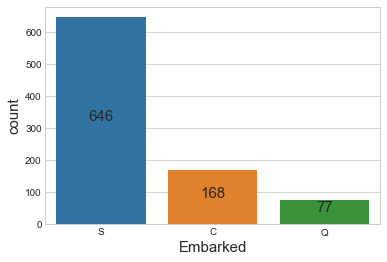

In [23]:
def countplot(data,xlabel="data"):
    # countplotとデータ件数をグラフ上に表示する関数
    # Args:
    # data(pd.Series) : 描画するデータ
    # xlabel(str) : xラベルの文字列,default : "data"
    #
    # Returns:
    # None
    vc = data.value_counts()
    g = sns.countplot(x=data)
    for index,num in enumerate(vc):
        plt.text(index,num/2,str(num),ha="center",fontsize=15)
    g.set_xlabel(xlabel,fontsize=15)
    g.set_ylabel("count",fontsize=15)
        
countplot(train['Embarked'],"Embarked")

<AxesSubplot:xlabel='count', ylabel='Embarked'>

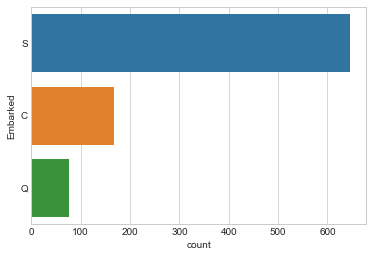

In [28]:
# y= で引数にデータを与えると横向きの棒グラフができる
sns.countplot(y=train["Embarked"])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

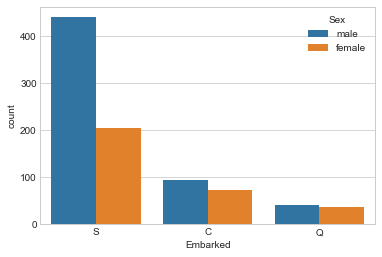

In [29]:
# hueに質的データのカラムを与えることでカテゴリ別の棒グラフを生成する
sns.countplot(x="Embarked", hue="Sex",data=train)

### Histgram(ヒストグラム : データの分布の可視化)
ヒストグラムは量的データを可視化する方法である.


ヒストグラムの階級数は大きすぎるとデータの特徴がない平凡なグラフになってしまい,階級数が小さすぎると凹凸のある分布の本質がとらえられない分布になってしまう. 階級数の決め方の参考としてスタージェスの公式がある. データの数$n$,階級数$k$とすると階級数$k$は次の式を目安にするとよい.
$$k = 1+\log{n}$$

Text(0, 0.5, 'count')

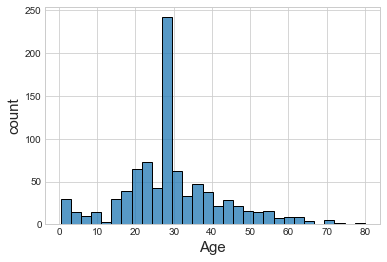

In [32]:
g = sns.histplot(data=train["Age"])
g.set_xlabel("Age",fontsize=15)
g.set_ylabel("count",fontsize=15)

Text(0, 0.5, 'count')

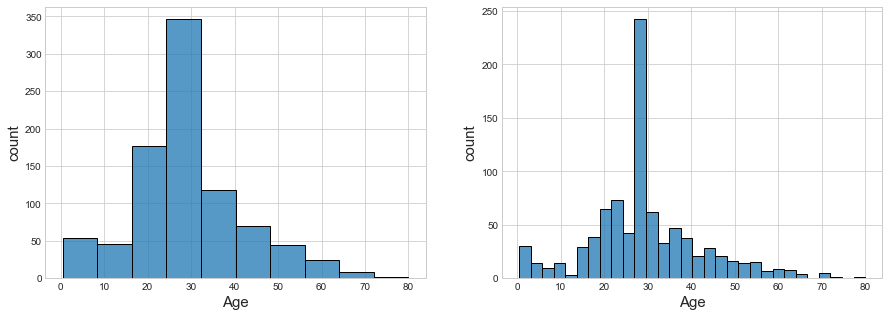

In [41]:
# binsを指定すると階級数を調整できる
plt.figure(facecolor="white",figsize=(15,5))
# bins=10
plt.subplot(1,2,1)
g1 = sns.histplot(data=train["Age"],bins=10)
g1.set_xlabel("Age",fontsize=15)
g1.set_ylabel("count",fontsize=15)

# bins=30
plt.subplot(1,2,2)
g2 = sns.histplot(data=train["Age"],bins=30)
g2.set_xlabel("Age",fontsize=15)
g2.set_ylabel("count",fontsize=15)

Text(0, 0.5, 'count')

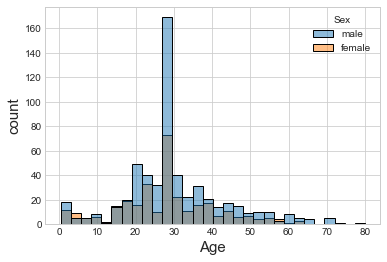

In [44]:
# hueを引数として与えるとカテゴリ別のヒストグラムを生成する
g = sns.histplot(data=train,x="Age",hue="Sex")
g.set_xlabel("Age",fontsize=15)
g.set_ylabel("count",fontsize=15)

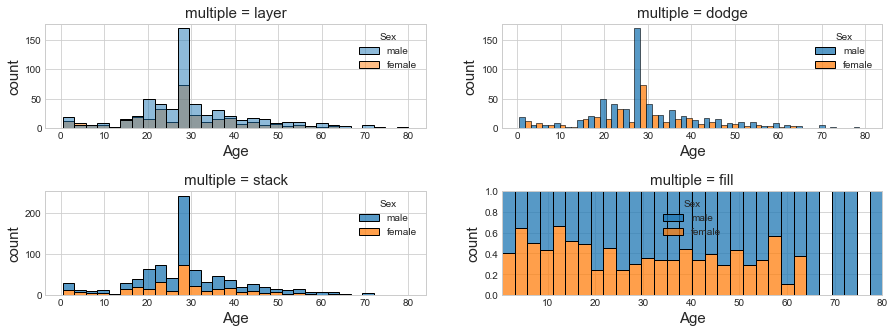

In [48]:
# multipleを引数で与えるとカテゴリ別の描画方法を変更できる
plt.figure(facecolor="white",figsize=(15,5))

# 同じレイヤー上に描画
plt.subplot(2,2,1)
g1 = sns.histplot(data=train,x="Age",hue="Sex",multiple="layer")
g1.set_xlabel("Age",fontsize=15)
g1.set_ylabel("count",fontsize=15)
g1.set_title("multiple = layer",fontsize=15)

# 横にカテゴリ別に分けて描画
plt.subplot(2,2,2)
g2 = sns.histplot(data=train,x="Age",hue="Sex",multiple="dodge")
g2.set_xlabel("Age",fontsize=15)
g2.set_ylabel("count",fontsize=15)
g2.set_title("multiple = dodge",fontsize=15)

# 縦にカテゴリ別に分けて描画
plt.subplot(2,2,3)
g3 = sns.histplot(data=train,x="Age",hue="Sex",multiple="stack")
g3.set_xlabel("Age",fontsize=15)
g3.set_ylabel("count",fontsize=15)
g3.set_title("multiple = stack",fontsize=15)

# カテゴリ別の割合で描画
plt.subplot(2,2,4)
g4 = sns.histplot(data=train,x="Age",hue="Sex",multiple="fill")
g4.set_xlabel("Age",fontsize=15)
g4.set_ylabel("count",fontsize=15)
g4.set_title("multiple = fill",fontsize=15)

plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

Text(0, 0.5, 'count')

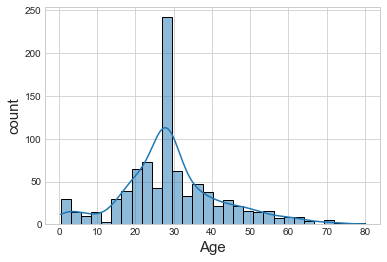

In [49]:
# kde=TrueでKernel Density Estimation(カーネル密度推定)を描画
g = sns.histplot(data=train["Age"],kde=True)
g.set_xlabel("Age",fontsize=15)
g.set_ylabel("count",fontsize=15)

Text(0, 0.5, 'count')

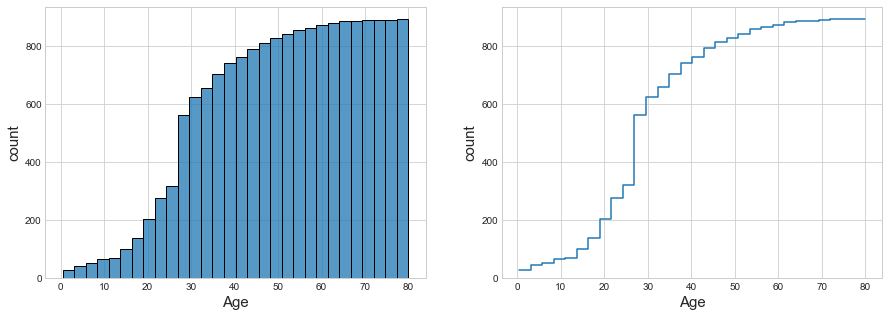

In [53]:
# cumlative=Trueで累積度数を描画
plt.figure(facecolor="white",figsize=(15,5))
plt.subplot(1,2,1)
g = sns.histplot(data=train["Age"],cumulative=True)
g.set_xlabel("Age",fontsize=15)
g.set_ylabel("count",fontsize=15)

# 棒柱を非表示にする
plt.subplot(1,2,2)
g = sns.histplot(data=train["Age"],cumulative=True,fill=False,element="step")
g.set_xlabel("Age",fontsize=15)
g.set_ylabel("count",fontsize=15)

Text(0, 0.5, 'count')

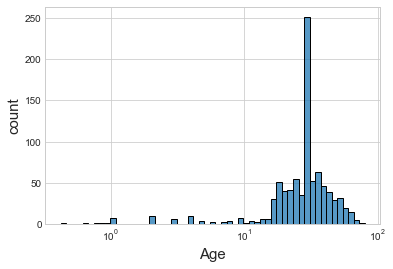

In [55]:
# log_scale=Trueで縦軸を対数で描画
g = sns.histplot(data=train,x="Age",log_scale=True)
g.set_xlabel("Age",fontsize=15)
g.set_ylabel("count",fontsize=15)

### lineplot(折れ線グラフ : 時系列データの可視化)
折れ線グラフは時系列データの可視化を行う方法である. ここでは月別の飛行機の搭乗人数のデータセットを用いる.

In [77]:
# load data
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Text(0, 0.5, 'passengers')

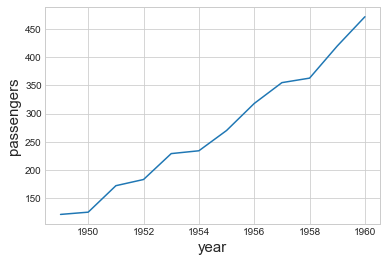

In [60]:
# 毎年5月の搭乗人数のみを抽出
may_flights = flights[flights["month"]=="May"]
g = sns.lineplot(data=may_flights,x="year",y="passengers")
g.set_xlabel("year",fontsize=15)
g.set_ylabel("passengers",fontsize=15)

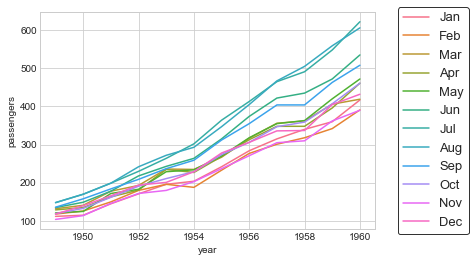

In [95]:
# hueを引数で与えることでカテゴリ別に描画
# 月別に搭乗人数を描画
sns.lineplot(data=flights, x="year", y="passengers", hue="month")
# loc : 凡例の位置 : bestだと自動で良いのを選んでくれる.
# frameon : 凡例の枠線を表示
# bbox_to_anchor(x,y,width(option),height(option)) : 凡例の表示位置を指定
# fontsize : フォントサイズ
# edgecolor : 凡例の枠線の色
ax = plt.gca() # カレント(操作している)グラフ
ax.legend(loc='right',frameon=True,bbox_to_anchor=(1.3, 0.5),fontsize=13,edgecolor="black")

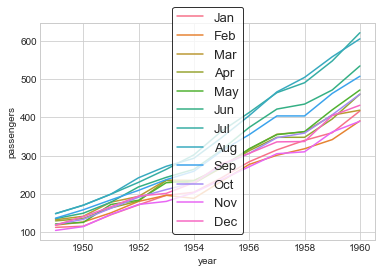

In [96]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")
ax = plt.gca()
ax.legend(loc='best',frameon=True,fontsize=13,edgecolor="black")

### normal probability plot(正規Q-Qプロット)
正規Q-Qプロットはデータの正規性(どの程度正規分布に従っているか)を可視化する方法である. 横軸に標準正規分布N(0,1),縦軸にデータをとる. データが直線(赤)に乗っている,つまり線形性があるほどデータが正規分布に従っていることが確認できる. また,直線から外れているデータは外れ値,異常値として解釈できるから,外れ値や異常値の検出に使用することもできる.

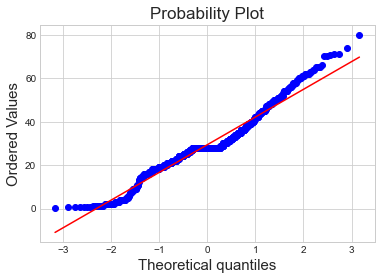

In [97]:
from scipy import stats

plt.figure(facecolor='white')
stats.probplot(train['Age'],dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

## 2次元データの可視化

### catplot
catplotは棒グラフ,pointplot,箱ひげ図,violinplot,swarmplotをまとめたグラフ描画のための関数である.

Documents : https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot

#### barplot(棒グラフ : カテゴリ別の推定値の可視化)
棒グラフは横軸に質的データ,縦軸に量的データ,カテゴリ別の量的データの推定値(デフォルトは平均値)をとる.

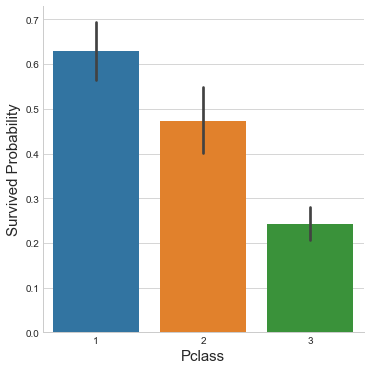

In [103]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train,kind = "bar")
g.set_xlabels("Pclass",fontsize=15)
g.set_ylabels("Survived Probability",fontsize=15)
plt.show()

#### pointplot( カテゴリ別の推定値の可視化)
pointplotはbarplotと同様に横軸に質的データ,縦軸に数値データをとる. barplotとの違いは各カテゴリの推定値を点で繋ぐことで値の違いを明確にすることである.

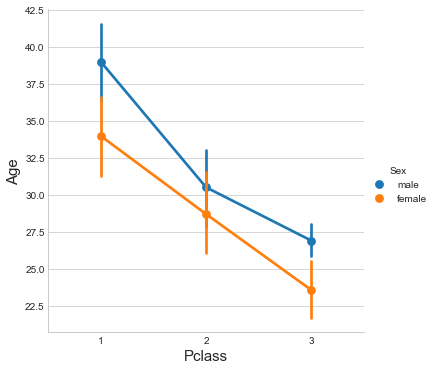

In [106]:
g = sns.catplot(x = "Pclass", y = "Age",hue="Sex",data = train,kind = "point")
g.set_xlabels("Pclass",fontsize=15)
g.set_ylabels("Age",fontsize=15)
plt.show()

#### boxplot(箱ひげ図 : 外れ値,四分位数を明示的に可視化)
箱ひげ図はカテゴリ別の量的データの外れ値や四分位数を明示的に描画する方法である.

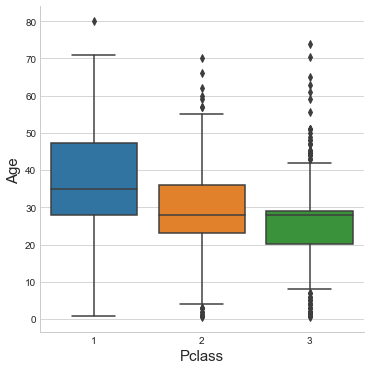

In [107]:
g = sns.catplot(x = "Pclass", y = "Age",data = train,kind = "box")
g.set_xlabels("Pclass",fontsize=15)
g.set_ylabels("Age",fontsize=15)
plt.show()

#### violinplot(箱ひげ図とKernel Density Estimated)
violinplotは箱ひげ図とKernel Density Estimatedを組み合わせた描画方法である.

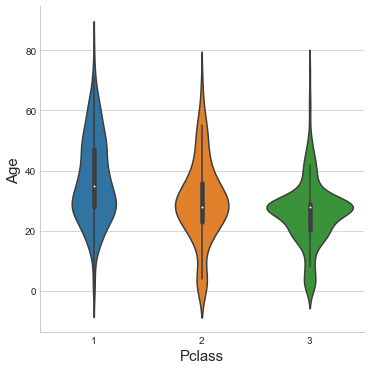

In [109]:
g = sns.catplot(x = "Pclass", y = "Age",data = train,kind = "violin",split = True)
g.set_xlabels("Pclass",fontsize=15)
g.set_ylabels("Age",fontsize=15)
plt.show()

#### swarmplot(データが重ならないように可視化)
swarmplotはカテゴリ別の量的データの散布図をデータが重ならないように描画する方法である.

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


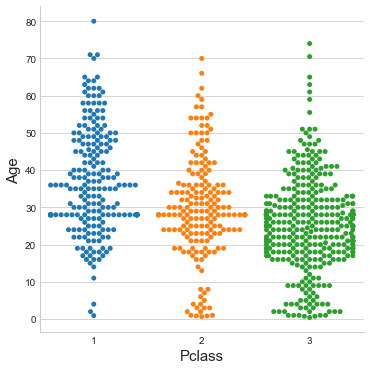

In [110]:
g = sns.catplot(x = "Pclass", y = "Age",data = train,kind = "swarm")
g.set_xlabels("Pclass",fontsize=15)
g.set_ylabels("Age",fontsize=15)
plt.show()

### scatterplot(散布図 : 量的データの可視化)
散布図は横軸および縦軸に量的データをとり,データの傾向を可視化する方法である. ここではディナーとランチの総支払額と,チップの額のデータセットを用いる.

In [111]:
# load data
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'tip')

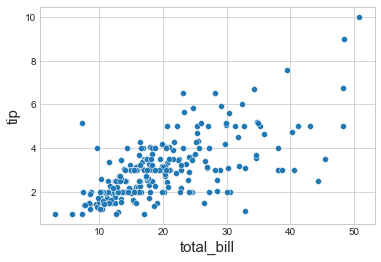

In [115]:
g = sns.scatterplot(data=tips,x="total_bill",y="tip")
g.set_xlabel("total_bill",fontsize=15)
g.set_ylabel("tip",fontsize=15)

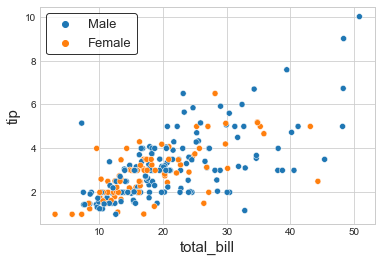

In [117]:
# hueを指定してカテゴリで色分け
g = sns.scatterplot(data=tips,x="total_bill",y="tip",hue="sex")
g.set_xlabel("total_bill",fontsize=15)
g.set_ylabel("tip",fontsize=15)
ax = plt.gca() # カレント(操作している)グラフ
ax.legend(loc='best',frameon=True,fontsize=13,edgecolor="black")

### regplot(散布図と最小二乗直線を描画)

regplotは散布図に加えて最小二乗直線とその信頼区間を描画する.

Text(0, 0.5, 'tip')

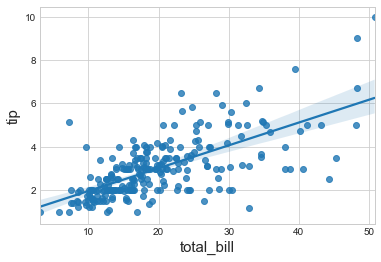

In [119]:
g = sns.regplot(data=tips,x="total_bill",y="tip")
g.set_xlabel("total_bill",fontsize=15)
g.set_ylabel("tip",fontsize=15)

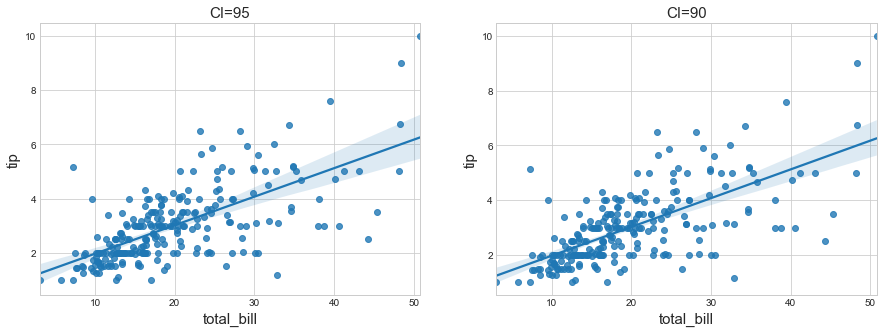

In [122]:
# ciで信頼区間を指定,default : 95
plt.figure(facecolor="white",figsize=(15,5))
plt.subplot(1,2,1)
g = sns.regplot(data=tips,x="total_bill",y="tip",ci=95)
g.set_xlabel("total_bill",fontsize=15)
g.set_ylabel("tip",fontsize=15)
g.set_title("CI=95",fontsize=15)

plt.subplot(1,2,2)
g = sns.regplot(data=tips,x="total_bill",y="tip",ci=90)
g.set_xlabel("total_bill",fontsize=15)
g.set_ylabel("tip",fontsize=15)
g.set_title("CI=90",fontsize=15)
plt.show()

### heatmap
heatmapは数値の大きさを色で可視化する方法である. 主に相関行列を可視化するために用いられる.

<AxesSubplot:>

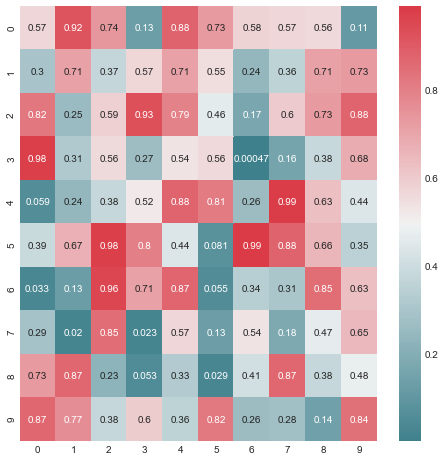

In [124]:
# 10行10列の一様乱数を生成
uniform_data = np.random.rand(10, 10)

colormap = sns.diverging_palette(210,10, as_cmap = True)
plt.figure(figsize=(8,8),facecolor="white")
sns.heatmap(uniform_data,annot=True,cmap=colormap)

In [130]:
def visual_corr(data,method="Pearson"):
    # 相関行列を可視化する関数
    # Args:
    # data(pd.DataFrame) : heatmapを作成するデータ
    # method(str) : 相関係数を計算する方法,default="Pearson",Select : Pearson Spearman Kendall
    #
    # Returns:
    # None
    fig , ax = plt.subplots(figsize =(8, 8),facecolor='white')
    colormap = sns.diverging_palette(210,10, as_cmap = True)
    corr = data.corr(method=str.lower(method))
    fig = sns.heatmap(
        corr, 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, #めちゃくちゃになったらFalse
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    plt.title(method+' Correlation of Features', y=1.05, size=15)
    plt.show()

``pearson`` : ピアソンの積率相関係数  
データ($x_1$,$y_1$), ... ,($x_n$,$y_n$)について,分散$s_x^2$,$s_y^2$,共分散$s_{xy}$
とするとピアソンの相関係数$r$は
$$r = \frac{s_{xy}}{s_x s_y}$$  
  
``spearman`` : スピアマンの順位相関係数  
順位相関係数とは2つの質的基準があるときに,2つの基準による順位の相関を表す指標である.
2つの基準による順位$R_i$,$R_i'$とするとspearmanの順位相関係数$r_s$は
$$r_s = 1 -\frac{6}{n(n^2-1)} \Sigma ^n _{i=1} (R_i-R_i')^2$$  
  
``kendoll`` : ケンドールの順位相関係数  
観測対象の対(i,j)(i,j=1,2, ... ,n)について正順すなわち$R_i < R_j$,$R_i' < R_j'$ or $R_i > R_j$,$R_i' > R_j'$のとき+1,逆順のとき-1を与え,+1を与えた対の数G,-1を与えた対の数Hとするとケンドールの順位相関係数$r_k$は
$$r_k = \frac{2(G-H)}{n(n-1)}$$  
  
Reference : 統計学入門 東京大学教養学部統計教室編

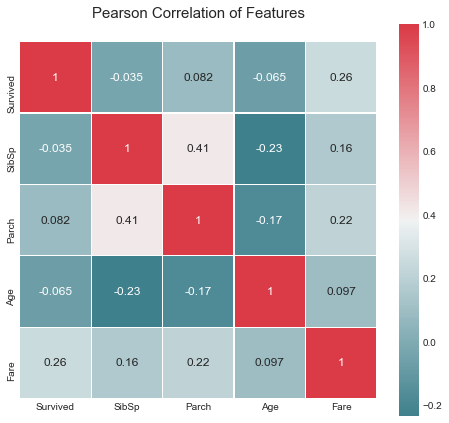

In [131]:
visual_corr(train[["Survived","SibSp","Parch","Age","Fare"]],"Pearson")